In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
from scipy.sparse import diags

# Generate A and b
N = 100
h = 1/(N+1)

A = (1/h**2) * diags([-1, 2, -1], [-1, 0, 1], shape=(N, N), dtype=int).toarray()
print(A)

b = np.array([-8, ] * N)
b

[[ 20402. -10201.      0. ...      0.      0.      0.]
 [-10201.  20402. -10201. ...      0.      0.      0.]
 [     0. -10201.  20402. ...      0.      0.      0.]
 ...
 [     0.      0.      0. ...  20402. -10201.      0.]
 [     0.      0.      0. ... -10201.  20402. -10201.]
 [     0.      0.      0. ...      0. -10201.  20402.]]


array([-8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8,
       -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8,
       -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8,
       -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8,
       -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8,
       -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8])

In [91]:
def j(A,b,x):
    
    return (  ( (1/2) * np.dot(x,np.dot(A,x)) ) - np.dot(b,x) )

In [92]:
def grad_j(A,b,x):
    return np.dot(A,x) - b

In [93]:
def g_i(i,h):
    
    t_i = i*h
    
    val = -10*((t_i-0.4)**2) + 0.625
    
    return -1 + np.maximum(0,val)

In [94]:
x = np.ones((N,))

print(j(A,b,x) )
grad_j(A,b,x).shape

11001.0


(100,)

In [95]:
I = np.arange(1,N+1)

G = np.array([g_i(i,h) for i in np.arange(1,N+1)])
G

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -0.95862906, -0.9117709 , -0.86687335, -0.82393638, -0.78296   ,
       -0.74394422, -0.70688903, -0.67179443, -0.63866043, -0.60748701,
       -0.57827419, -0.55102196, -0.52573032, -0.50239927, -0.48102882,
       -0.46161896, -0.44416969, -0.42868101, -0.41515293, -0.40358543,
       -0.39397853, -0.38633222, -0.38064651, -0.37692138, -0.37515685,
       -0.37535291, -0.37750956, -0.3816268 , -0.38770464, -0.39574306,
       -0.40574208, -0.4177017 , -0.4316219 , -0.4475027 , -0.46534408,
       -0.48514606, -0.50690864, -0.5306318 , -0.55631556, -0.58395991,
       -0.61356485, -0.64513038, -0.6786565 , -0.71414322, -0.75159053,
       -0.79099843, -0.83236692, -0.87569601, -0.92098569, -0.96823596,
       -1.        , -1.        , -1.        , -1.        , -1.  

4.901480247034596e-05
found solution in 4389 iterations
[-0.02450568 -0.04822726 -0.07116487 -0.09331865 -0.1146887  -0.1352752
 -0.15507821 -0.1740979  -0.19233433 -0.20978766 -0.22645791 -0.24234526
 -0.25744969 -0.27177136 -0.28531025 -0.29806648 -0.31004001 -0.32123097
 -0.33163926 -0.34126499 -0.35010807 -0.35816856 -0.36544635 -0.3719415
 -0.37765385 -0.38258345 -0.38673013 -0.3900939  -0.3926746  -0.3944722
 -0.39548653 -0.39571754 -0.39516508 -0.39382905 -0.39170929 -0.38880571
 -0.38511816 -0.38064651 -0.37692138 -0.37515685 -0.37535291 -0.37750956
 -0.3816268  -0.38770464 -0.39574306 -0.40574208 -0.4177017  -0.43008932
 -0.44169498 -0.45252078 -0.46256916 -0.47184198 -0.48034182 -0.48807031
 -0.4950301  -0.50122255 -0.50665037 -0.51131465 -0.51521812 -0.51836153
 -0.52074763 -0.52237686 -0.52325188 -0.52337284 -0.52274232 -0.52136013
 -0.51922872 -0.5163476  -0.51271906 -0.50834228 -0.50321938 -0.49734925
 -0.49073376 -0.48337154 -0.47526422 -0.46641016 -0.45681072 -0.4464640

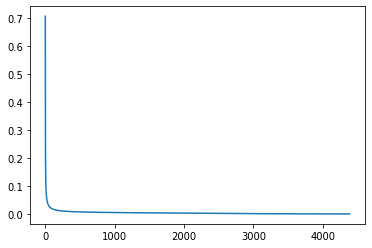

In [97]:
def projected_gradient(A,b,g,j,grad_j,N,h,epsilon=1e-4,max_iter=10000):
    
    #find optimal rho
    eigenvals = np.linalg.eigvals(A)
    lambda_1,lambda_n = min(eigenvals), max(eigenvals)
    
    rho = (2/(lambda_1 + lambda_n))
    print(rho)
    
    residue = []
    
    G = np.array([g_i(i,h) for i in np.arange(1,N+1)])
    
    prev = np.zeros((N,)) 
    X = np.ones((N,))
    
    
    for n in range(max_iter):
        prev = X
        X = X - rho*grad_j(A,b,X)
        X = np.maximum(X,G)
        
        
        residue.append(np.linalg.norm(X - prev))
        
        if residue[-1] < epsilon:
            print("found solution in",n,"iterations")
            plt.plot(residue)    
            return X
                 
    print("could not find solution after",max_iter,"iterations")
    
    

    
print(projected_gradient(A,b,g_i,j,grad_j,N,h))